# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.9/500.9 KB 13.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 KB 28.2 MB/s eta 0:00:00
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [14]:
!pip install twitter

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [15]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [16]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [26]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [18]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [19]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [20]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

AttributeError: module 'tweepy' has no attribute 'StreamListener'

## Use the REST API to Collect Tweets

Authorize the REST API 

In [21]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [22]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # define the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [27]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 07 19:37:04 +0000 2022'
'Mon Nov 07 19:10:10 +0000 2022'
'Mon Nov 07 19:08:02 +0000 2022'
'Mon Nov 07 19:06:32 +0000 2022'
'Mon Nov 07 19:06:15 +0000 2022'
'Mon Nov 07 19:06:11 +0000 2022'
'Mon Nov 07 19:05:00 +0000 2022'
'Mon Nov 07 19:01:22 +0000 2022'
'Mon Nov 07 18:57:40 +0000 2022'
'Mon Nov 07 18:46:10 +0000 2022'
'Mon Nov 07 18:46:09 +0000 2022'
'Mon Nov 07 18:45:16 +0000 2022'
'Mon Nov 07 18:41:32 +0000 2022'
'Mon Nov 07 18:39:23 +0000 2022'
'Mon Nov 07 18:25:35 +0000 2022'
'Mon Nov 07 18:15:22 +0000 2022'
'Mon Nov 07 18:12:40 +0000 2022'
'Mon Nov 07 18:11:33 +0000 2022'
'Mon Nov 07 18:09:50 +0000 2022'
'Mon Nov 07 18:09:48 +0000 2022'
'Mon Nov 07 18:09:33 +0000 2022'
'Mon Nov 07 18:08:17 +0000 2022'
'Mon Nov 07 18:07:00 +0000 2022'
'Mon Nov 07 18:02:44 +0000 2022'
'Mon Nov 07 18:01:11 +0000 2022'
'Mon Nov 07 17:55:31 +0000 2022'
'Mon Nov 07 17:51:00 +0000 2022'
'Mon Nov 07 17:49:26 +0000 2022'
'Mon Nov 07 17:45:44 +0000 2022'
'Mon Nov 07 17:44:55 +0000 2022'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [24]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 07 13:48:46 +0000 2022'
'Mon Nov 07 13:48:36 +0000 2022'
'Mon Nov 07 13:45:04 +0000 2022'
'Mon Nov 07 13:43:10 +0000 2022'
'Mon Nov 07 13:42:22 +0000 2022'
'Mon Nov 07 13:30:28 +0000 2022'
'Mon Nov 07 13:26:00 +0000 2022'
'Mon Nov 07 13:20:02 +0000 2022'
'Mon Nov 07 13:19:37 +0000 2022'
'Mon Nov 07 13:15:03 +0000 2022'
'Mon Nov 07 13:13:34 +0000 2022'
'Mon Nov 07 13:12:28 +0000 2022'
'Mon Nov 07 13:11:08 +0000 2022'
'Mon Nov 07 13:10:24 +0000 2022'
'Mon Nov 07 13:09:36 +0000 2022'
'Mon Nov 07 13:07:15 +0000 2022'
'Mon Nov 07 13:04:50 +0000 2022'
'Mon Nov 07 13:00:03 +0000 2022'
'Mon Nov 07 12:51:45 +0000 2022'
'Mon Nov 07 12:49:00 +0000 2022'
'Mon Nov 07 12:48:23 +0000 2022'
'Mon Nov 07 12:45:25 +0000 2022'
'Mon Nov 07 12:44:46 +0000 2022'
'Mon Nov 07 12:40:31 +0000 2022'
'Mon Nov 07 12:39:24 +0000 2022'
'Mon Nov 07 12:36:41 +0000 2022'
'Mon Nov 07 12:35:02 +0000 2022'
'Mon Nov 07 12:35:02 +0000 2022'
'Mon Nov 07 12:30:34 +0000 2022'
'Mon Nov 07 12:24:43 +0000 2022'
'Mon Nov 0

'Sat Nov 05 14:07:14 +0000 2022'
'Sat Nov 05 14:02:41 +0000 2022'
'Sat Nov 05 14:01:49 +0000 2022'
'Sat Nov 05 14:00:27 +0000 2022'
'Sat Nov 05 14:00:01 +0000 2022'
'Sat Nov 05 13:59:42 +0000 2022'
'Sat Nov 05 13:58:31 +0000 2022'
'Sat Nov 05 13:55:05 +0000 2022'
'Sat Nov 05 13:54:23 +0000 2022'
'Sat Nov 05 13:52:16 +0000 2022'
'Sat Nov 05 13:51:54 +0000 2022'
'Sat Nov 05 13:50:21 +0000 2022'
'Sat Nov 05 13:41:46 +0000 2022'
'Sat Nov 05 13:34:01 +0000 2022'
'Sat Nov 05 13:32:03 +0000 2022'
'Sat Nov 05 13:28:52 +0000 2022'
'Sat Nov 05 13:26:47 +0000 2022'
'Sat Nov 05 13:21:18 +0000 2022'
'Sat Nov 05 13:02:16 +0000 2022'
'Sat Nov 05 12:33:57 +0000 2022'
'Sat Nov 05 12:26:15 +0000 2022'
'Sat Nov 05 12:25:00 +0000 2022'
'Sat Nov 05 12:13:43 +0000 2022'
'Sat Nov 05 12:01:23 +0000 2022'
'Sat Nov 05 11:43:04 +0000 2022'
'Sat Nov 05 10:56:05 +0000 2022'
'Sat Nov 05 10:42:09 +0000 2022'
'Sat Nov 05 09:45:46 +0000 2022'
'Sat Nov 05 09:33:40 +0000 2022'
'Sat Nov 05 09:23:24 +0000 2022'
'Sat Nov 0

'Fri Nov 04 01:35:35 +0000 2022'
'Fri Nov 04 01:30:58 +0000 2022'
'Fri Nov 04 01:22:56 +0000 2022'
'Fri Nov 04 01:21:08 +0000 2022'
'Fri Nov 04 01:19:52 +0000 2022'
'Fri Nov 04 01:18:57 +0000 2022'
'Fri Nov 04 01:17:21 +0000 2022'
'Fri Nov 04 01:12:34 +0000 2022'
'Fri Nov 04 00:52:23 +0000 2022'
'Fri Nov 04 00:50:35 +0000 2022'
'Fri Nov 04 00:49:53 +0000 2022'
'Fri Nov 04 00:46:53 +0000 2022'
'Fri Nov 04 00:43:57 +0000 2022'
'Fri Nov 04 00:42:27 +0000 2022'
'Fri Nov 04 00:38:51 +0000 2022'
'Fri Nov 04 00:34:21 +0000 2022'
'Fri Nov 04 00:25:02 +0000 2022'
'Fri Nov 04 00:19:08 +0000 2022'
'Fri Nov 04 00:15:08 +0000 2022'
'Fri Nov 04 00:06:30 +0000 2022'
'Thu Nov 03 23:48:14 +0000 2022'
'Thu Nov 03 23:46:49 +0000 2022'
'Thu Nov 03 23:38:14 +0000 2022'
'Thu Nov 03 23:35:51 +0000 2022'
'Thu Nov 03 23:27:30 +0000 2022'
'Thu Nov 03 23:23:56 +0000 2022'
'Thu Nov 03 23:18:02 +0000 2022'
'Thu Nov 03 23:15:00 +0000 2022'
'Thu Nov 03 22:56:43 +0000 2022'
'Thu Nov 03 22:55:03 +0000 2022'
'Thu Nov 0

'Wed Nov 02 21:18:30 +0000 2022'
'Wed Nov 02 21:06:27 +0000 2022'
'Wed Nov 02 21:01:34 +0000 2022'
'Wed Nov 02 21:00:27 +0000 2022'
'Wed Nov 02 20:53:30 +0000 2022'
'Wed Nov 02 20:44:52 +0000 2022'
'Wed Nov 02 20:38:50 +0000 2022'
'Wed Nov 02 20:36:25 +0000 2022'
'Wed Nov 02 20:20:26 +0000 2022'
'Wed Nov 02 20:12:29 +0000 2022'
'Wed Nov 02 20:09:01 +0000 2022'
'Wed Nov 02 20:05:59 +0000 2022'
'Wed Nov 02 19:59:42 +0000 2022'
'Wed Nov 02 19:31:54 +0000 2022'
'Wed Nov 02 19:24:55 +0000 2022'
'Wed Nov 02 19:17:59 +0000 2022'
'Wed Nov 02 19:13:39 +0000 2022'
'Wed Nov 02 19:02:36 +0000 2022'
'Wed Nov 02 18:59:08 +0000 2022'
'Wed Nov 02 18:54:33 +0000 2022'
'Wed Nov 02 18:52:19 +0000 2022'
'Wed Nov 02 18:46:25 +0000 2022'
'Wed Nov 02 18:31:41 +0000 2022'
'Wed Nov 02 18:26:58 +0000 2022'
'Wed Nov 02 18:18:55 +0000 2022'
'Wed Nov 02 18:17:02 +0000 2022'
'Wed Nov 02 18:17:02 +0000 2022'
'Wed Nov 02 18:00:23 +0000 2022'
'Wed Nov 02 17:54:36 +0000 2022'
'Wed Nov 02 17:29:57 +0000 2022'
'Wed Nov 0

'Mon Oct 31 23:39:50 +0000 2022'
'Mon Oct 31 23:25:48 +0000 2022'
'Mon Oct 31 23:01:03 +0000 2022'
'Mon Oct 31 22:59:02 +0000 2022'
'Mon Oct 31 22:53:18 +0000 2022'
'Mon Oct 31 22:05:54 +0000 2022'
'Mon Oct 31 21:48:49 +0000 2022'
'Mon Oct 31 21:30:24 +0000 2022'
'Mon Oct 31 21:30:23 +0000 2022'
'Mon Oct 31 21:11:07 +0000 2022'
'Mon Oct 31 21:02:11 +0000 2022'
'Mon Oct 31 20:59:52 +0000 2022'
'Mon Oct 31 20:55:45 +0000 2022'
'Mon Oct 31 20:43:43 +0000 2022'
'Mon Oct 31 20:38:56 +0000 2022'
'Mon Oct 31 20:21:01 +0000 2022'
'Mon Oct 31 20:12:48 +0000 2022'
'Mon Oct 31 20:10:42 +0000 2022'
'Mon Oct 31 19:48:08 +0000 2022'
'Mon Oct 31 19:40:50 +0000 2022'
'Mon Oct 31 19:35:38 +0000 2022'
'Mon Oct 31 19:35:17 +0000 2022'
'Mon Oct 31 19:35:10 +0000 2022'
'Mon Oct 31 19:35:05 +0000 2022'
'Mon Oct 31 19:28:31 +0000 2022'
'Mon Oct 31 19:26:37 +0000 2022'
'Mon Oct 31 19:25:05 +0000 2022'
'Mon Oct 31 19:24:23 +0000 2022'
'Mon Oct 31 19:23:15 +0000 2022'
'Mon Oct 31 19:10:33 +0000 2022'
'Mon Oct 3

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [28]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

100
84


Create a text index and print the Tweets containing specific keywords. 

In [29]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [30]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [31]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Goldi Gaines
text: Say yes to voting. Tomorrow is Election Day get your vote in. Your vote is your voice. Here is a link to find a loc… https://t.co/w7cKzEC3l3
----
name: Generation180
text: Tomorrow is Election Day! If you haven’t voted yet, in-person voting is the best option to ensure that your vote wi… https://t.co/Tb1sFoVJVN
----
name: CommonGroundAR
text: ⏰Today is your last day to Early Vote! 

🗳️Not gonna make it today? There are more than 900 places to vote on Elect… https://t.co/4fqtsGYQKM
----
name: Virginia National Organization for Women (NOW)
text: 🧵Your #VOTE matters! Vote like your #equality depends on it because it does‼️💯 Please don’t sit out these midterm… https://t.co/fiA5jiKmaw
----
name: JesseGibsonforAR
text: Get out and vote!  Rain or shine! Today is the last day of early voting and polls close at 5 PM!  Take your friends… https://t.co/YmOaqbd5S4
----
name: Monica Davidson, Cand. for Saline Cty JP Dist. 2
text: Make your plan to early vote today or to

In [32]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [33]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,63695e913ac9f79d34cd130c,Mon Nov 07 18:57:40 +0000 2022,1589693583409352706,1589693583409352706,Say yes to voting. Tomorrow is Election Day ge...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3,2,False,False,False,en,NaN,NaN,NaN,NaN
1,63695e923ac9f79d34cd1342,Mon Nov 07 16:09:08 +0000 2022,1589651173774184448,1589651173774184448,Tomorrow is Election Day! If you haven’t voted...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.hubspot.com/"" rel=""nofollo...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
2,63695e923ac9f79d34cd133c,Mon Nov 07 16:17:43 +0000 2022,1589653333010108416,1589653333010108416,⏰Today is your last day to Early Vote! \n\n🗳️N...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,1,False,False,False,en,NaN,NaN,NaN,NaN
3,63695e923ac9f79d34cd1329,Mon Nov 07 17:08:57 +0000 2022,1589666224958754818,1589666224958754818,🧵Your #VOTE matters! Vote like your #equality ...,True,"{'hashtags': [{'text': 'VOTE', 'indices': [6, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.589665e+18,...,4,5,False,False,False,en,NaN,NaN,NaN,NaN
4,63695e923ac9f79d34cd1349,Mon Nov 07 15:33:03 +0000 2022,1589642091969531911,1589642091969531911,Get out and vote! Rain or shine! Today is the...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20,56,False,False,False,en,NaN,NaN,NaN,NaN
5,63695e933ac9f79d34cd1361,Mon Nov 07 14:27:52 +0000 2022,1589625689728118784,1589625689728118784,Make your plan to early vote today or tomorrow...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,4,False,False,False,en,1.589618e+18,1589618499722395650,{'created_at': 'Mon Nov 07 13:59:18 +0000 2022...,NaN
6,63695e923ac9f79d34cd1331,Mon Nov 07 16:35:01 +0000 2022,1589657685351596033,1589657685351596033,Independent means voting for election deniers ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.589657e+18,...,1,3,False,False,NaN,en,NaN,NaN,NaN,NaN
7,63695e923ac9f79d34cd1323,Mon Nov 07 17:30:57 +0000 2022,1589671761108684800,1589671761108684800,@w_terrence There is an election Democrats are...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.589372e+18,...,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN
8,63695e923ac9f79d34cd133a,Mon Nov 07 16:24:45 +0000 2022,1589655101806870529,1589655101806870529,How do we pray when we vote? For what do we st...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,0,2,False,False,False,en,NaN,NaN,NaN,NaN
9,63695e923ac9f79d34cd1337,Mon Nov 07 16:26:35 +0000 2022,1589655561968095232,1589655561968095232,LAST DAY TO EARLY VOTE ELECTION DAY’S TOMORROW...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,"{'media': [{'id': 1589655555366338561, 'id_str..."


<AxesSubplot:>

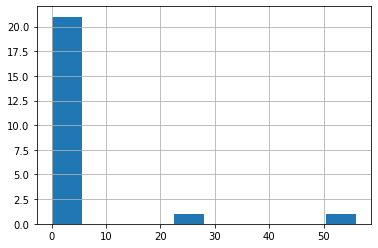

In [34]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count